Frederico Furst Bittencourt

Prof. Cimini

# Introduction

DISCLAIMER: All of this code is provided AS-IS.

This is a spin-off of the sum of assignments completed in the discipline Mecânica dos Materiais Compostos at Universidade Federal de Minas Gerais (UFMG), with Prof. Carlos Cimini.

In [1]:
import numpy as np
from matplotlib import pyplot as pl
inv = np.linalg.inv
a = np.array
np.set_printoptions(precision=4)

In [2]:
%matplotlib inline

# Methodology

<nl>
<li>Matrizes globais em função de matrizes locais.</li>
<li>Relações constitutivas para a lâmina.</li>
<li>Facilitar a entrada pra diversas lâminas com diversas orientações.</li>
</nl>

Nesta fase da implementação, já podemos contar com os modelos micromecânicos (pouco úteis) implementados em Composite.Material e com o cálculo das matrizes A, a e D, d através da classe Composite.SymmetricComposite.

In [3]:
import Composite as c

## Data Input

Valores sem símbolos, a fim de produzir saída com o número maior que o pedido de algarismos significativos, i.e. três (3).

In [4]:
mat_dado1 = c.Material(
                    F1t=1280., F2t=30., F1c=335., F2c=158., F6=49.
)
mat_dado1.E_1 = 87000. # MPa
mat_dado1.E_2 = 5500. # MPa
mat_dado1.nu_12 = 0.34
mat_dado1.G_12 = 2200. # MPa

Questao 3 da Prova 1 da Pos Graduacao com o Cimini

In [4]:
mat_dado3 = c.Material(
                    F1t=1280., F2t=30., F1c=335., F2c=158., F6=49.
)
mat_dado3.E_1 = 40000. # MPa
mat_dado3.E_2 = 10000. # MPa
mat_dado3.nu_12 = 0.25
mat_dado3.G_12 = 3500. # MPa

# Parte 3a

Estender seu código para que ele possa calcular para cada lâmina, dadas as cargas no plano $N_x$, $N_y$ e $N_s$ e os momentos $M_x$, $M_y$ e $M_s$:

In [5]:
# Obs: as cargas abaixo são arbitrárias e não são pertinentes ao trabalho
Nmatrix = np.matrix([
        [0.1],
        [0.0],
        [0.0]
    ]) # MN
Mmatrix = np.matrix([
        [0.0],
        [0.2],
        [0.0]
    ]) # MN.m

(A) tensões e deformações no sistema de coordenadas "no-eixo" (on-axis);

Podemos tomar composto simétrico da parte 2 como exemplo nos cálculos.

In [ ]:
sc31 = c.SymmetricComposite(
    sheets=[c.Sheet(theta=+45, material = mat_dado1, thickness=0.001),
                    c.Sheet(theta=-45, material = mat_dado1, thickness=0.001)],
    thickness = 0.004 )
# sem sanduíche

Q3 P1

In [5]:
(2*40.63+4*10.16)*0.2

24.380000000000003

In [6]:
2083*1.2

2499.6

In [7]:
_/2

1249.8

In [8]:
0.04145*1250-0.00345*2500 # eps x

43.1875

In [9]:
-0.00345*1250+0.02763*2500 # eps y

64.7625

Obs: é necessário popular as posições simétricas para cada objeto do tipo Composite.SymmetricComposite, antes de efetuar as chamadas para as funções a seguir.

In [7]:
sc31.populate_symmetric_positions()

In [8]:
p45sheet = sc31.sheets[0]

In [9]:
m45sheet = sc31.sheets[0]

In [10]:
p45sheet.get_on_axis_compliance()

matrix([[ 1.1494e-05, -3.9080e-06,  0.0000e+00],
        [-3.9080e-06,  1.8182e-04,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  4.5455e-04]])

In [11]:
m45sheet.get_on_axis_compliance()

matrix([[ 1.1494e-05, -3.9080e-06,  0.0000e+00],
        [-3.9080e-06,  1.8182e-04,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  4.5455e-04]])

In [12]:
Amatrix = sc31.get_A()
number_of_total_sheets = 2*len(sc31.sheets)
epsilon0 = inv(Amatrix)*Nmatrix/sc31.thickness
epsilon0

matrix([[ 1.4849],
        [-1.356 ],
        [ 0.    ]])

In [13]:
Dmatrix = sc31.get_A()
number_of_total_sheets = 2*len(sc31.sheets)
kappa = inv(Dmatrix)*Mmatrix/sc31.thickness
kappa

matrix([[-2.712 ],
        [ 2.9698],
        [ 0.    ]])

In [14]:
sc31.epsilon0 = epsilon0

In [15]:
sc31.kappa = kappa

Sabe-se que as deformações "off-axis" podem ser obtidas através da equação:

\begin{equation}
    \epsilon_{x,y}^k = \epsilon^0 + z^k \kappa
\end{equation}

In [16]:
sc31.calculate_strain(Nmatrix,Mmatrix)

In [17]:
sc31.epsilon0

matrix([[ 1.4849],
        [-1.356 ],
        [ 0.    ]])

In [18]:
sc31.kappa

matrix([[-1958804.0931],
        [ 2302559.5432],
        [  118364.4203]])

In [19]:
sc31.update_lamina_strain()

In [20]:
sc31.update_lamina_stress()

(B) critério de falha da primeira lâmina (Tsai-Wu).

O método abaixo, assim como métodos implementados acima, possuem como único parâmetro um compósito simétrico, o que faz com que seja bastante simples o processo de refatorar o código a cada ciclo de implementação.

In [21]:
sc31.assess_safety()

In [22]:
sc31.pos_safety_factors

[1.4820246784678102e-05,
 -2.541451191142892e-05,
 6.512942274252321e-06,
 -7.339876822595916e-06]

In [23]:
sc31.neg_safety_factors

[2.5490783442698826e-05,
 -1.4840546109433445e-05,
 7.347254991422587e-06,
 -6.51767014401095e-06]

Neste caso, $S_f = 0.017 > 1 \Rightarrow$ ~59 vezes menos seguro que o necessário.

Obs: não é de se surpreender que ambos os fatores de segurança para lâminas de z positivo e para lâminas de z negativo são correspondentes, já que a deformação $\kappa$ neste caso.

# Parte 3b

No problema a seguir utilizar o material a ser anunciado:

(C) para um vaso de pressão submetido à pressão interna de 0,1 MPa com diâmetro média de 1 m com layup $[+\theta/-\theta]_{ns}$:

<ul>
    <li>determinar o ângulo $\theta_0$ ótimo (máxima resistência) para FPF (falha de primeira lâmina) pelo critério de falha de Tsai-Wu - Dica: calcular o menor $S_f$ para o laminado $[+\theta/-\theta]_{s}$;</li>
    <li>determinar a mínima espessura para FPF (falha de primeira lâmina) pelo critério de falha de Tsai-Wu - Dica: aumentar (ou reduzir) a espessura em escala de forma a determinar o menor n para que o $S_f$ mínimo do laminado $[+\theta_0/-\theta_0]_{ns}$ seja igual a 1;</li>
    <li>comparar os resultados em termos de massa por unidade de comprimento (kg/m) para o vaso dimensionado, com vasos de pressão em alumínio 2024-T6 (E = 73 GPa, $\nu$ = 0,3, $\rho = 2700 kg/m^3$ e $\sigma_e = 340 MPa$) e aço A517 Grau B ( E = 210 GPa, $\nu$ = 0,3, $\rho = 7800 kg/m^3$ e $\sigma_e = 690 MPa$), com a determinação das respectivas espessuras utilizando criteerio de falha de Von Mises.</li>
</ul>

Assim, é possível avaliar o ângulo ótimo conforme pedido no item (C).

## Determinação de $\theta_0$

In [24]:
# storage for graphing information
x_pos_angles = []
y_pos_safeties = []

In [25]:
# varying 1 degree per iteration
# vaso de pressão
p = 0.1 # MPa
r = 0.5 # m
t = 0.001 # m
h = t*4 # m
sigmax = p*r/2
sigmay = p*r
# Obs: supomos condições condizentes 
Nmatrix = np.matrix([
        [ sigmax ],
        [ sigmay ],
        [0.0]
    ]) # MPa
Mmatrix = np.matrix([
        [0.0],
        [0.0],
        [0.0]
    ]) # MPa.m

In [26]:
for i in range(180):
    # using values 
    s1 = c.Sheet(theta=+i,material=mat_dado1,thickness=0.001)
    s2 = c.Sheet(theta=-i,material=mat_dado1,thickness=0.001)
    sc32 = c.SymmetricComposite([
            s1, s2
        ], thickness = 0.004) # metros
    # sem sanduíche, já que ele somente ocuparia espaço...
    sc32.populate_symmetric_positions()
    sc32.calculate_strain(Nmatrix,Mmatrix)
    sc32.update_lamina_strain()
    sc32.update_lamina_stress()
    sc32.assess_safety()
    x_pos_angles.append(i)
    y_pos_safeties.append(sc32.neg_safety_factors[0])

No gráfico abaixo, consideramos laminas de ângulos variando entre 0 e 180 graus, e dois máximos destacam-se.

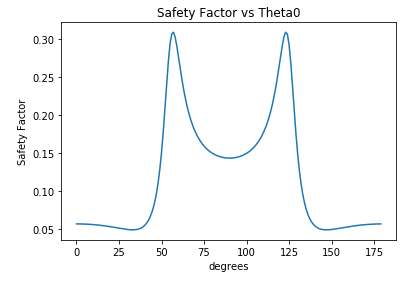

In [27]:
pl.annotate('local max', xy=(123, 0.4), xytext=(60, 50),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
pl.title('Safety Factor vs Theta0')
pl.xlabel('degrees')
pl.ylabel('Safety Factor')
pl.plot(x_pos_angles,y_pos_safeties)

In [28]:
x_pos_angles[y_pos_safeties.index(max(y_pos_safeties))]

123

Portanto, temos $\theta_0 = 53^\circ$.

In [29]:
max(y_pos_safeties)

0.3087945938857901

Para o ângulo máximo, temos que $S_f = 0.0024 < 1$ é ~404 vezes menos seguro que o mínimo necessário.

## Determinação da espessura mínima $h$ do laminado 

In [30]:
# storage for graphing information
x_number = []
y_stress = []
y_strain = []
y_pos_safeties = []

In [31]:
# vaso de pressão
p = 10. # MPa
r = 0.5 # m
t = 0.0001 # m

In [32]:
Nx = p*r/2
Ny = p*r
Nmatrix = np.matrix([
        [ Nx ],
        [ Ny ],
        [0.0]
    ]) # MPa - correspondentes a um metro(!?)
Mmatrix = np.matrix([
        [0.0],
        [0.0],
        [0.0]
    ])

In [33]:
for n in range(100):
    # podemos aproveitar a natureza linear do problema
    h = 4*(100*n+1)*t# 10 cm , considerando que o restante vai ser honeycomb?
    # usando 38 graus
    s1 = c.Sheet(theta=+38,material=mat_dado1,thickness=t)
    s2 = c.Sheet(theta=-38,material=mat_dado1,thickness=t)
    sheets = []
    for i in range(n+1):
        sheets.append(s1)
        sheets.append(s2)
    sc32 = c.SymmetricComposite(sheets, thickness = h) # metros
    # sem sanduíche, já que ele somente ocuparia espaço...
    sc32.populate_symmetric_positions()
    sc32.calculate_strain(Nmatrix,Mmatrix)
    sc32.update_lamina_strain()
    sc32.update_lamina_stress()
    sc32.assess_safety()
    x_number.append(4*(30*n+1))
    sheet = sc32.sheets[0]
    y_stress.append(sheet.pos_sigma_on.A[0])
    y_strain.append(sc32.epsilon0[0].A1)
    y_pos_safeties.append(sc32.pos_safety_factors[0])

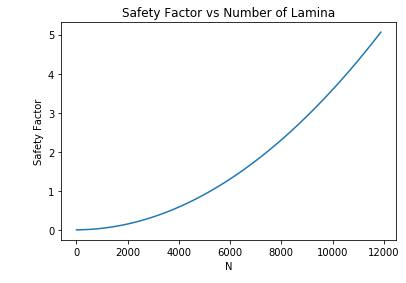

In [34]:
pl.annotate('no variation', xy=(4, 54), xytext=(6, 55),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
pl.title('Safety Factor vs Number of Lamina')
pl.xlabel('N')
pl.ylabel('Safety Factor')
pl.plot(x_number, y_pos_safeties)

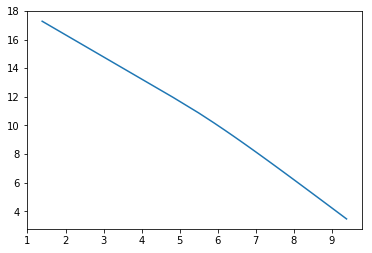

In [35]:
pl.plot(np.log(x_number), np.log(y_stress))

Obs: o gráfico abaixo foi obtido utilizando o valor de $58^\circ$, e resultou em um gráfico de mesmo formato que o anterio, i.e. $S_f$ constante.

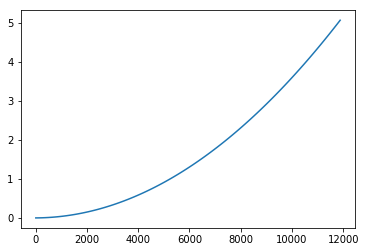

In [36]:
pl.plot(x_number, y_pos_safeties)

Por inspeção, encontramos:

In [37]:
y_pos_safeties[45]

1.0584362482147656

In [38]:
x_number[45]

5404

Portanto, necessitaríamos de 5404 lâminas para o projeto do tanque em questão, com lâminas de kevlar-epóxi a +/-55 graus de inclinação. 

### Cálculo do peso linear do Composto

In [39]:
hcomp = 5404*0.0001
hcomp

0.5404

In [40]:
rhocomp = 1380

In [41]:
LinWeightComp = 9.81*2*np.pi*r*hcomp*rhocomp # g = 9.81 m/s2
LinWeightComp

22983.34873512497

## Comparação com outros materiais

In [42]:
# vaso de pressão
p = 10 # MPa
r = 0.5 # m

In [43]:
h_hist = []
J2_hist = []

In [44]:
for h in np.linspace(0.001,0.05,100):
    # podemos aproveitar a natureza linear do problema
    t = h # m
    sigmax = p*r/2/t
    sigmay = p*r/t
    sigma = np.matrix([
            [ sigmax, 0, 0 ],
            [ 0, sigmay, 0 ],
            [ 0, 0, 0 ]
        ])
    sigmadev = sigma - 1/3*np.trace(sigma)*np.identity(3)
    J2 = -1/2*(np.trace(sigmadev)**2 - np.trace(sigmadev*sigmadev))
    h_hist.append(h)
    J2_hist.append(J2)

In [45]:
J2_hist

[6250000.0,
 2796578.250547845,
 1578403.2054420363,
 1012232.3022010708,
 703892.5596093076,
 517646.7854245537,
 396611.5028261755,
 313549.3233144285,
 254089.91168943213,
 210069.44444444444,
 176571.17902923143,
 150490.48751486326,
 129788.7149367861,
 113082.33769494327,
 99405.65540184188,
 88068.03478080843,
 78564.97911346702,
 70521.01945145427,
 63652.0494907836,
 57739.89065887452,
 52614.75072600946,
 48142.89554096876,
 44217.835618831334,
 40753.92727979156,
 37681.66089965398,
 34944.146411588066,
 32494.460591291092,
 30293.62281685627,
 28309.034721127842,
 26513.26610110803,
 24883.101974562116,
 23398.788505701465,
 22043.431745564503,
 20802.514792899397,
 19663.507451307687,
 18615.548672641668,
 17649.186678802304,
 16756.16509252289,
 15929.24599813653,
 15162.06282022722,
 14448.99741265499,
 13785.07690950531,
 13165.886788365078,
 12587.497297817126,
 12046.400951814396,
 11539.459228515621,
 11063.856956487263,
 10617.063146794822,
 10196.797250591395,
 980

In [46]:
sigmav = np.sqrt(3/2*np.array(J2_hist))

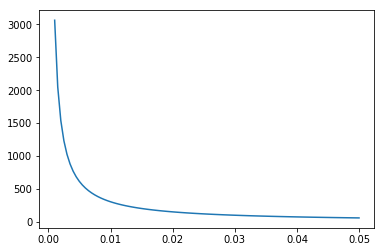

In [47]:
pl.plot(h_hist,sigmav)

em [MPa].

Características do alumínio: 2024-T6

In [48]:
Ealum = 73000 # MPa
nualum = 0.3
rhoalum = 2700 # kg/m3
sigmaealum = 240 # MPa

In [49]:
sigmav[24]

237.7445926818967

In [50]:
halum = h_hist[24]
halum

0.012878787878787878

em [m].

### Cálculo do peso linear de alumínio

In [51]:
LinWeightAlum = 9.81*2*np.pi*r*halum*rhoalum # g = 9.81 m/s2
LinWeightAlum

1071.661513989211

Características do aço: A517 grau B

In [52]:
Eaco = 210000 # MPa
nuaco = 0.3
rhoaco = 7800 # kg/m3
sigmaeaco = 690 # MPa

In [53]:
sigmav[7]

685.8017096593175

In [54]:
haco = h_hist[7]
haco

0.004464646464646465

em [m].

### Cálculo do peso linear do aço

In [55]:
LinWeightSteel = 9.81*2*np.pi*r*haco*rhoaco # g = 9.81 m/s2
LinWeightSteel

1073.2491606766023

# Conclusão

A implementação numérica do modelo ora apresentado mostrou-se produtiva em um sentido inesperado. Esta produtividade inesperada explica-se, quiçá, por uma certa circularidade inerente aos exercícios desta matéria. Conforme explicitado em <i>slide</i> sobre o Processo de Projeto, a circularidade a eles inerente pode apresentar-se confusa a princípio. 

Felizmente, a experiência de interpretação subjetiva dos cálculos de projeto foi facilitada pelo trabalho proposto. Ainda, é possível afirmar que houve um certo grau de sinergia entre este trabalho, um trabalho recentemente entregue à disciplina de Análise Fisicamente Não-Linear e os assuntos sendo desenvolvidos na disciplina de Método dos Elementos Finitos.

In [56]:
mat1 = sc31.sheets[0].material

In [57]:
mat1.get_constitutive_on()

(matrix([[ 1.1494e-05, -3.9080e-06,  0.0000e+00],
         [-3.9080e-06,  1.8182e-04,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  4.5455e-04]]),
 matrix([[87640.4807,  1883.7667,     0.    ],
         [ 1883.7667, 87640.4807,     0.    ],
         [    0.    ,     0.    ,  2200.    ]]))

In [58]:
sh1 = sc31.sheets[0]

In [59]:
sh1.get_on_axis_compliance()

matrix([[ 1.1494e-05, -3.9080e-06,  0.0000e+00],
        [-3.9080e-06,  1.8182e-04,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  4.5455e-04]])

In [60]:
sh1.get_on_axis_stiffness()

matrix([[87640.4807,  1883.7667,     0.    ],
        [ 1883.7667,  5540.4902,     0.    ],
        [    0.    ,     0.    ,  2200.    ]])